Danny Ryan

Lab 13 

Clustering

3/31/2020

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
from matplotlib import image as img

image_path = 'panda_picture.jpg'
image = img.imread(image_path)

if image is None:
    print('********************************************')
    print('*** Unable to load image', image_path)
    print('********************************************\n')

image.shape


(759, 759, 3)

Image loaded ( 379 x 379 )


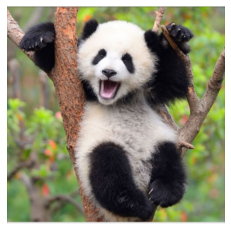

In [ ]:
from skimage.transform import resize

# Resize to make things faster
# You can play with what fraction to use for resizing.
image = resize(image, (image.shape[0] // 2, image.shape[1] // 2),
               anti_aliasing=True, mode='constant')

# Normalize pixel values between 0 and 1
image = image / image.max()

# get the height, width, and number of color channels (3)
h, w, ch = image.shape

print('Image loaded (', h, 'x', w, ')')

# show the image
plt.figure()
plt.axis("off")
plt.imshow(image);

In [ ]:
pixels = image.reshape((h * w, 3))
print('pixels is', pixels.shape)

# First 5 rows
pixels[:5]


pixels is (143641, 3)


array([[0.82666203, 0.84137308, 0.82762172],
       [0.87269905, 0.88539244, 0.86281753],
       [0.88048011, 0.88733254, 0.85492266],
       [0.87952036, 0.88341089, 0.84021155],
       [0.88443777, 0.88244077, 0.83731181]])

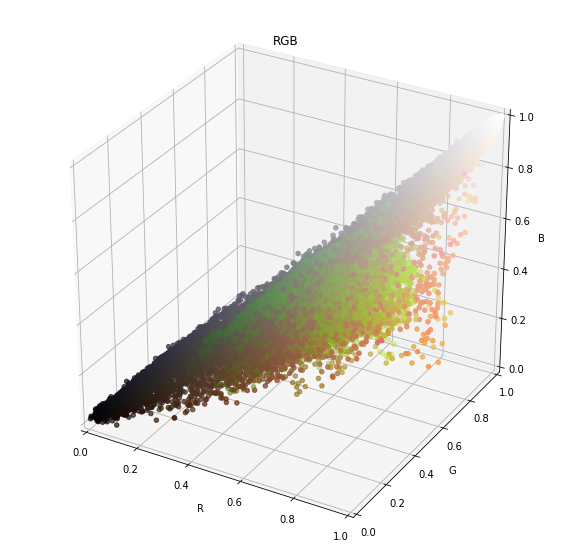

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('RGB')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
data = pixels
subsample = 5
data = data[::subsample]
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data)
plt.show()

Running Kmeans on list of 143641 pixels with k = 4 ...
Kmeans complete


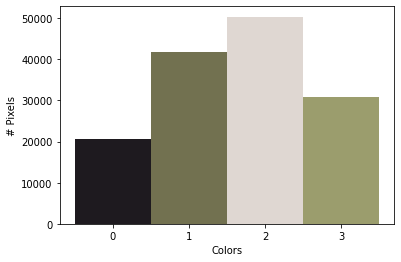

In [ ]:
k = 4
print('Running Kmeans on list of', pixels.shape[0], 'pixels with k =', k, '...')
clt = KMeans(n_clusters=k)
clt.fit(pixels)
print('Kmeans complete')

# Assign each pixel to the closest cluster center
cluster_labels = clt.predict(pixels)

# Get the list of cluster centers
colors = clt.cluster_centers_

# Count how many pixels have been assigned to each cluster label
counts = {}
for label in cluster_labels:
    if not label in counts:
        counts[label] = 1
    else:
        counts[label] += 1

# Show histogram of pixel counts for each cluster
plt.figure()
x = np.arange(k)
plt.bar(x, counts.values(), color=colors, width=1)
plt.xticks(x)
plt.xlabel('Colors')
plt.ylabel('# Pixels')
plt.show()

[[0.8759518  0.84281912 0.82416122]
 [0.8759518  0.84281912 0.82416122]
 [0.8759518  0.84281912 0.82416122]
 [0.8759518  0.84281912 0.82416122]
 [0.8759518  0.84281912 0.82416122]]


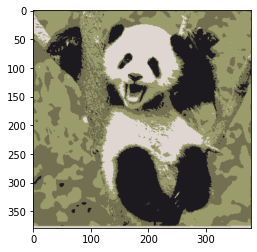

In [ ]:
# Assign each pixel to be the color of its closest cluster center
quant = colors[cluster_labels]
print(quant[:5])

# reshape list of RGB values back into an image
img = quant.reshape((h, w, ch))

plt.figure()
plt.imshow(img)
plt.show()

I picked my ideal value of k by trial and error. I went as low as k=3, but I thought the image quality was too low, so I then settled for k=4, of which I like the picture and it uses limited colors compared to higher values of K

The higher K is, the longer the run time, and vice-versa

The less points clustered means a longer run time, and vice-versa 

In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1eb8ptJBgNsbtXVQ2tRSNt_GhP_4xej6b')
df.head(10)


,state,temp,snowfall
0,AL,46.5,1.6
1,AK,2.6,74.5
2,AZ,43.6,0.3
3,AR,41.5,5.2
4,CA,46.2,0.0
5,CO,25.8,19.1
6,CT,28.5,40.5
7,DE,36.1,20.2
8,FL,59.4,0.0
9,GA,47.8,0.7


In [ ]:
df.dtypes

state        object
temp        float64
snowfall    float64
dtype: object

In [ ]:
X = df[['temp', 'snowfall']]
X.head()

,temp,snowfall
0,46.5,1.6
1,2.6,74.5
2,43.6,0.3
3,41.5,5.2
4,46.2,0.0


In [ ]:
print('Running Kmeans on list of', df.shape[0], 'states...')

# TO DO -----------

# Create a KMeans model with k clusters
k = 4
km = KMeans(n_clusters=k, random_state=0)

print('KMeans complete')

# Fit the model to the data (just temp and snowfall)
#df = df.values
km.fit(X)


print('KMeans fitted')

# Predict the cluster labels based on the data
cluster_labels = km.predict(X)

print("Kmeans predicted cluster labels")



Running Kmeans on list of 50 states...
KMeans complete
KMeans fitted
Kmeans predicted cluster labels


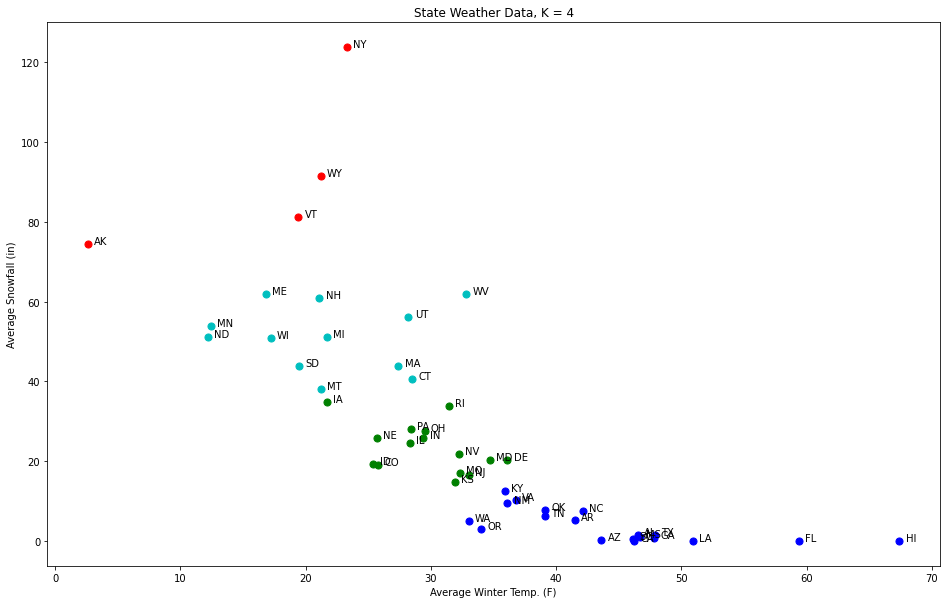

In [ ]:
colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

# Plot states one at a time
for i, row in df.iterrows():
    # which cluster was this state assigned to?
    # (if you're getting an error here, make sure to create a variable named
    # cluster_labels in the cell above.)
    curr_label = cluster_labels[i]

    # which color should we use for this cluster?
    curr_color = colors[curr_label]

    # Plot this state
    plt.scatter(row['temp'], row['snowfall'], c=curr_color, s=50)

    # Add a text label for this state's name
    plt.text(row['temp']+0.5, row['snowfall'], row['state'], size=10)

plt.title('State Weather Data, K = ' + str(k))
plt.xlabel('Average Winter Temp. (F)')
plt.ylabel('Average Snowfall (in)')
plt.show()

I have four gropups named as follows 

- hot/dry (blue)
- moderate/moderate(green)
-cold/moderate (light blue)
-cold/wet (red)

I chose four clusters as I did not want to make too many, as that would increase the cost signifigantly. I like the four clusters and I feel each of the clusters has similar levels of snow and temperature. 'Hot/dry' has warm weather and little snow, 'moderate/moderate' has medium heat and small amounts of snow, 'cold/moderate' has colder temperatures with medium amounts of snow, and 'cold/wet' is very cold with lots of snow

To encourage states that are close to one another, we could use longitude and lattitude on an x-y plane as two additional columns for the computer to compare on a row by ro